# <font color='green' style='font-size: 30px;'> Produzindo sinais e parâmetros a partir dos dados
 </font> <hr style='border: 2px solid green;'>

In [14]:
import pandas as pd
import numpy as np

# Carrega os dados do arquivo CSV para um DataFrame
df_real = pd.read_csv('a5.csv', sep=';', header=None, decimal=',')

# Criando as listas vazias para armazenar os arrays
tempo_list = []
saida_list = []

# Variáveis para guardar os valores temporários
tempo = []
saida = []

# Variável para armazenar o último valor da terceira coluna — que é a coluna que indica o degrau 6→7 ou 7→6
last_val = df_real.iloc[0, 2]

# Loop pelas linhas do DataFrame
for i, row in df_real.iterrows():
    # Verifica se o valor da terceira coluna mudou — enquato não tiver mudado, adiciona-mos no array.
    if row[2] != last_val:
        # Adiciona os arrays de tempo e saída nas respectivas listas
        tempo_list.append(np.array(tempo))
        saida_list.append(np.array(saida))
        # Reseta as variáveis de tempo e saída
        tempo = []
        saida = []
        # Atualiza o valor da terceira coluna
        last_val = row[2]
    # Adiciona os valores de tempo e saída aos arrays temporários
    tempo.append(row[0])
    saida.append(row[1])

# Adiciona os últimos arrays de tempo e saída às listas
tempo_list.append(np.array(tempo))
saida_list.append(np.array(saida))


In [15]:
import pandas as pd
import numpy as np

# Função para calcular o coeficiente de amortecimento (\zeta)
def calcular_coeficiente_amortecimento(Mp):
    return np.abs(np.log(Mp) / np.sqrt(np.pi**2 + np.log(Mp)**2))

# Função para calcular a frequência natural não amortecida (\omega_d)
def calcular_frequencia_nao_amortecida(tp, zeta):
    return np.pi / (tp * np.sqrt(1 - zeta**2))

# Função para calcular a frequência natural amortecida (\omega_n)
def calcular_frequencia_natural_amortecida(wd, zeta):
    return wd * np.sqrt(1 - zeta**2)


# Supondo que 'data' seja a lista contendo os arrays separados
valor_inicial_list = []
valor_extremo_list = []
valor_final_list = []
tempo_pico_list = []
delta_maximo_list = []
delta_saida_list = []
sobressinal_list = []
zeta_list = []
wd_list = []
wn_list = []
ganho_list = []

# Supondo que 'data' seja a lista contendo os arrays separados
for tempo_array, saida_array in zip(tempo_list, saida_list):
    valor_inicial = saida_array[0]
    valor_final = saida_array[-1]
    amplitude = np.ptp(saida_array)
    
    if valor_final > valor_inicial:  # 7 -> 6
        valor_extremo = np.amax(saida_array)
        tempo_pico = tempo_array[np.argmax(saida_array)] - tempo_array[0]
    else:  # 6 -> 7
        valor_extremo = np.amin(saida_array)
        tempo_pico = tempo_array[np.argmin(saida_array)] - tempo_array[0]
    
    delta_maximo = np.abs(valor_extremo - valor_final)
    delta_saida = np.abs(valor_inicial - valor_final)
    sobressinal = delta_maximo / delta_saida
    ganho = valor_final/valor_inicial
    
    valor_inicial_list.append(valor_inicial)
    valor_extremo_list.append(valor_extremo)
    valor_final_list.append(valor_final)
    tempo_pico_list.append(tempo_pico)
    delta_maximo_list.append(delta_maximo)
    delta_saida_list.append(delta_saida)
    sobressinal_list.append(sobressinal)
    ganho_list.append(ganho)
    
    zeta = calcular_coeficiente_amortecimento(sobressinal)
    wd = calcular_frequencia_nao_amortecida(tempo_pico, zeta)
    wn = calcular_frequencia_natural_amortecida(wd, zeta)
    
    zeta_list.append(round(zeta, 4))
    wd_list.append(round(wd, 4))
    wn_list.append(round(wn, 4))

# Cria um DataFrame com as colunas desejadas
df = pd.DataFrame({
    'Valor Inicial': valor_inicial_list,
    'Valor Extremo': valor_extremo_list,
    'Valor Final': valor_final_list,
    'Tempo Pico': tempo_pico_list,
    'Delta Máximo': delta_maximo_list,
    'Delta Saída': delta_saida_list,
    'Sobressinal (M_p)': sobressinal_list,
    'Coeficiente de Amortecimento (\u03B6)': zeta_list,
    'Frequência Natural não Amortecida (\u03C9_d)': wd_list,
    'Frequência Natural Amortecida (\u03C9_n)': wn_list,
    'Ganho': ganho_list
})

# Exibe o DataFrame com 4 casas decimais
pd.set_option('display.float_format', '{:.4f}'.format)

# Retira a primeira e última coluna — que possuem dados problemáticos
df = df.drop([0, df.index[-1]])

df

,Valor Inicial,Valor Extremo,Valor Final,Tempo Pico,Delta Máximo,Delta Saída,Sobressinal (M_p),Coeficiente de Amortecimento (ζ),Frequência Natural não Amortecida (ω_d),Frequência Natural Amortecida (ω_n),Ganho
1,2.3000,5.6800,4.9400,0.7000,0.7400,2.6400,0.2803,0.3753,4.8418,4.4880,2.1478
2,5.0400,1.5200,2.4700,0.8000,0.9500,2.5700,0.3696,0.3020,4.1193,3.9270,0.4901
3,2.5800,5.6500,4.9200,0.4500,0.7300,2.3400,0.3120,0.3477,7.4458,6.9813,1.9070
4,5.0100,1.5000,2.4500,0.7500,0.9500,2.5600,0.3711,0.3009,4.3924,4.1888,0.4890
5,2.1200,5.6800,4.8900,0.7500,0.7900,2.7700,0.2852,0.3709,4.5104,4.1888,2.3066
6,4.9800,1.4800,2.4700,0.8000,0.9900,2.5100,0.3944,0.2839,4.0956,3.9270,0.4960
7,2.6400,5.6800,4.8800,0.6000,0.8000,2.2400,0.3571,0.3114,5.5100,5.2360,1.8485
8,4.9500,1.5700,2.4300,0.7000,0.8600,2.5200,0.3413,0.3238,4.7435,4.4880,0.4909
9,2.1400,5.6800,4.9700,0.8000,0.7100,2.8300,0.2509,0.4029,4.2906,3.9270,2.3224
10,5.0800,1.5100,2.4900,0.8000,0.9800,2.5900,0.3784,0.2955,4.1106,3.9270,0.4902


Agora, vamos tirar médias para algumas dessas colunas: $M_p, \zeta, \omega_d, \omega_n, k$.

In [13]:
# Calcula a média das colunas desejadas
media_mp = df['Sobressinal (M_p)'].mean()
media_zeta = df['Coeficiente de Amortecimento (ζ)'].mean()
media_omega_d = df['Frequência Natural não Amortecida (ω_d)'].mean()
media_omega_n = df['Frequência Natural Amortecida (ω_n)'].mean()
media_k = df['Ganho'].mean()

# Calcula a variação máxima em relação à média
var_max_mp = df['Sobressinal (M_p)'].max() - media_mp
var_max_zeta = df['Coeficiente de Amortecimento (ζ)'].max() - media_zeta
var_max_omega_d = df['Frequência Natural não Amortecida (ω_d)'].max() - media_omega_d
var_max_omega_n = df['Frequência Natural Amortecida (ω_n)'].max() - media_omega_n
var_max_k = df['Ganho'].max() - media_k

# Calcula o valor máximo das colunas
max_mp = df['Sobressinal (M_p)'].max()
max_zeta = df['Coeficiente de Amortecimento (ζ)'].max()
max_omega_d = df['Frequência Natural não Amortecida (ω_d)'].max()
max_omega_n = df['Frequência Natural Amortecida (ω_n)'].max()
max_k = df['Ganho'].max()

# Cria um novo DataFrame com as médias, valor máximo e variação máxima
df_medias = pd.DataFrame({
    'Sobressinal': [media_mp, max_mp, var_max_mp],
    'Coeficiente de Amortecimento (ζ)': [media_zeta, max_zeta, var_max_zeta],
    'Frequência Natural não Amortecida (ω_d)': [media_omega_d, max_omega_d, var_max_omega_d],
    'Frequência Natural Amortecida (ω_n)': [media_omega_n, max_omega_n, var_max_omega_n],
    'Ganho': [media_k, max_k, var_max_k]
}, index=['Média', 'Valor Máximo', 'Variação Máxima'])

df_medias


,Sobressinal,Coeficiente de Amortecimento (ζ),Frequência Natural não Amortecida (ω_d),Frequência Natural Amortecida (ω_n),Ganho
Média,0.3301,0.3346,4.7782,4.4971,1.3885
Valor Máximo,0.3944,0.4029,7.4458,6.9813,2.3224
Variação Máxima,0.0643,0.0683,2.6676,2.4842,0.9339


# <font color='green' style='font-size: 30px;'> Resposta ao degrau da função transferência obtida dos cálculos da tabela
 </font> <hr style='border: 2px solid green;'>

Considerando a tabela acima — em anexos no ambiente —, obtemos as médias para nosso $\zeta$ (zeta, coeficiente de amortecimento) e $\omega_n$ (omega n, nossa frequência natural amortecida) e $k$ (constante de proporção).

$$
\zeta = 0.3346 \\
\omega_n = 4.4971 \\
k = 1.3885
$$

O que nos dá a seguinte função transferência:

$$
G(s) \approx 1.3885 \cdot \frac{20.223}{s^2 + 3s + 20.223}
$$

O que faremos agora, é gerar simulações de resposta ao degrau via biblioteca Control do python. Depois disso, pegaremos os valores reais do arquivo 'a5.csv' e produziremos o sinal equivalente de resposta ao degrau. Por fim, faremos uma comparação desses dois sinais.

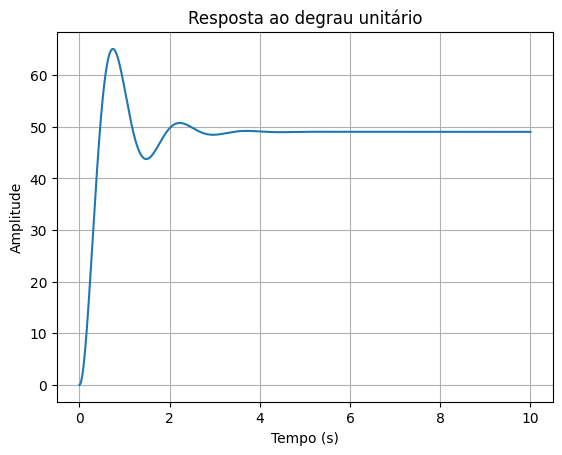

,Valor
Parâmetro,
RiseTime,0.28
SettlingTime,2.50
SettlingMin,43.74
SettlingMax,65.06
Overshoot,32.78
Undershoot,0.00
Peak,65.06
PeakTime,0.74
SteadyStateValue,49.00


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control

# parâmetros calculados
zeta = 0.3346
wn = 4.4971
# k = 1.3885
k = 49

# definindo a função transferência
num = [k*wn**2]
den = [1, 2*zeta*wn, wn**2]
G = control.tf(num, den)

# construção do vetor de tempo
t = np.linspace(0, 10, 1000)
y_simulado, t_simulado = control.step_response(G,t)

# configurações de plot
plt.plot(y_simulado,t_simulado)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta ao degrau unitário')
plt.grid()
plt.show()


# Obter informações de desempenho
info = control.step_info(G)

# Criar um DataFrame a partir do dicionário com as informações de desempenho
df_simulacao = pd.DataFrame.from_dict(info, orient='index', columns=['Valor'])
df_simulacao.index.name = 'Parâmetro'

# Formatar os valores como números com duas casas decimais
df_simulacao_formatada = df_simulacao.applymap(lambda x: f'{x:.2f}')

df_simulacao_formatada


# <font color='green' style='font-size: 30px;'> Gerando sinal a partir dos dados de a5 (gerados experimentalmente)
 </font> <hr style='border: 2px solid green
;'>

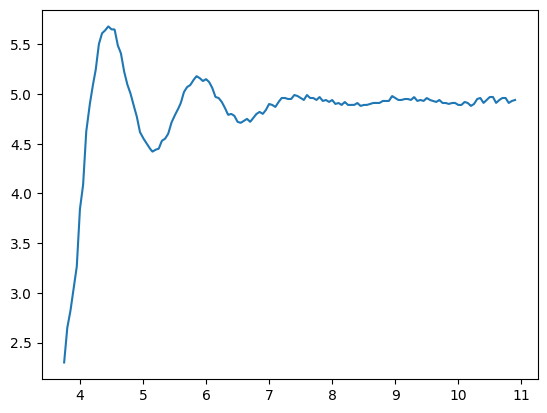

In [6]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# parâmetro de seleção das 13 amostras do dataset experimental
# as amostras impares são saltos 6 → 7 , logo são mais interessantes.
amostra = 1

# Cria uma função interpoladora — para preencher e tornar o gráfico contínuo
f = interp1d(tempo_list[amostra], saida_list[amostra])

# Encontra o valor mínimo de x
x_min = np.min(tempo_list[amostra])
x_max = np.max(tempo_list[amostra])

# Cria um novo conjunto de pontos com maior resolução
t_real = np.linspace(x_min, x_max, 1000)
y_real = f(t_real)

# Plota o gráfico com a curva interpolada
plt.plot(t_real, y_real)
plt.show()


# <font color='green' style='font-size: 30px;'> Comparando os dois sinais
 </font> <hr style='border: 2px solid green
;'>

Após somar-mos 3.7 aos valores do vetor saída e 4 ao vetor tempo da simulação, podemos ver que ambas as curvas obtidas são bastante similares. Isso nos dá bastante confidência sobre a função transferência obtida.

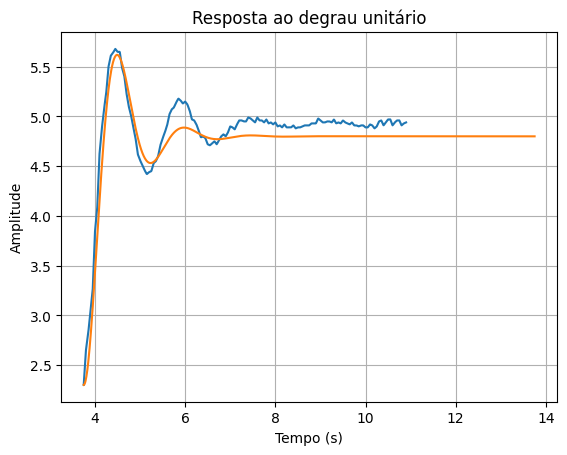

In [7]:
import matplotlib.pyplot as plt


# gera o plot com os valores experimentais
plt.plot(t_real, y_real, label='Experimental')

# gera o plot com os valores simulados — configurado para sempre partir das mesma condição inicial
plt.plot(y_simulado+t_real[0],t_simulado+y_real[0], label='Simulação')

# configurações do gráfico
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta ao degrau unitário')
plt.grid()

# plota
plt.show()
